In [74]:
import pandas as pd

# 데이터 파일 경로
file_path = '/content/sample_data/시계열분석_복합SCFI_2017.xlsx'

# 데이터 로드
data = pd.read_excel(file_path)

# 데이터 확인
data.head()


from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# Converting 'YYYYMM' to datetime
data['YYYYMM'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m')

# Splitting the data into train and test
train = data.iloc[:-6]
test = data.iloc[-6:]

# 도표 17-17. [예제 17-2] 이동평균법의 RMSE 계산 파이썬 코드

In [75]:
scfi_data = data
train_data = scfi_data.iloc[:-6]
test_data = scfi_data.iloc[-6:]

# 이동평균법(Moving Average) # 12개월 이동평균
window_size = 12
scfi_data['Moving_Average'] = scfi_data['SCFI_C'].rolling(window=window_size).mean()

#  테스트 데이터에 대한 예측값 계산
test_data['Moving_Average'] = scfi_data['Moving_Average'].iloc[-6:]

# RMSE 계산
rmse_moving_average = np.sqrt(mean_squared_error(test_data['SCFI_C'], test_data['Moving_Average']))
rmse_moving_average, test_data[['SCFI_C', 'Moving_Average']]

<ipython-input-75-c70491ac28b1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Moving_Average'] = scfi_data['Moving_Average'].iloc[-6:]


(64.6112995938035,
      SCFI_C  Moving_Average
 39  834.060      760.221917
 40  860.922      785.152500
 41  869.764      811.415500
 42  878.540      826.720000
 43  864.205      846.470000
 44  760.540      846.854833)

# 도표 17-19. [예제 17-4 이동평균법]의 예측치 계산(1안) 파이썬 코드

<ipython-input-76-f3c15e53d0e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Moving_Avg'] = train['SCFI_C'].rolling(window=window_size).mean()
<ipython-input-76-f3c15e53d0e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = test_predictions


train_last_values : 732.9515833333334


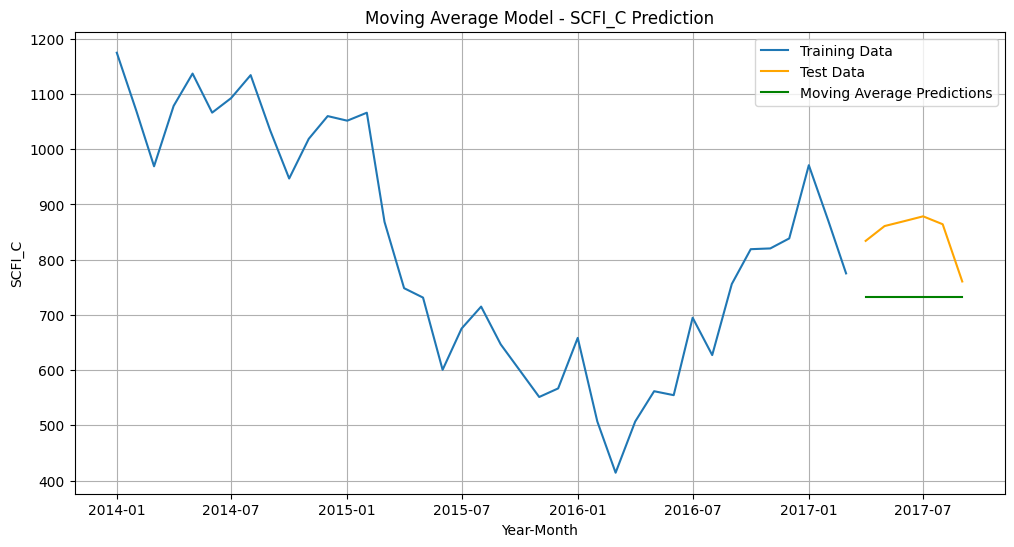

118.67430500127108

In [76]:

# 이동평균법 적용하기, window size을 12 months로 설정
window_size = 12
train['Moving_Avg'] = train['SCFI_C'].rolling(window=window_size).mean()

# 예측을 위하여 마지막 윈도우 창의 값이 사용된다.
# train_last_values = train['Moving_Avg'].dropna().tail(window_size).values  (최초)
# test_predictions = [train_last_values.mean()] * len(test)
train_last_values = train['Moving_Avg'].iloc[-1]   # (수정, 단지 마지막 이동평균값사용)
test_predictions = [train_last_values] * len(test)
test['Prediction'] = test_predictions

print('train_last_values :', train_last_values)

# test data에 대한 RMSE 계산
test_rmse = sqrt(mean_squared_error(test['SCFI_C'], test_predictions))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train['YYYYMM'], train['SCFI_C'], label='Training Data')
plt.plot(test['YYYYMM'], test['SCFI_C'], label='Test Data', color='orange')
plt.plot(test['YYYYMM'], test_predictions, label='Moving Average Predictions', color='green')
plt.title('Moving Average Model - SCFI_C Prediction')
plt.xlabel('Year-Month')
plt.ylabel('SCFI_C')
plt.legend()
plt.grid(True)
plt.show()

# Returning the RMSE for the test data
test_rmse

In [77]:
test[['SCFI_C', 'Prediction']]

,SCFI_C,Prediction
39,834.060,732.951583
40,860.922,732.951583
41,869.764,732.951583
42,878.540,732.951583
43,864.205,732.951583
44,760.540,732.951583


# 도표 17-22. 이동평균값의 평균을 사용한 예측

<ipython-input-78-7f59e4d359bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Moving_Avg'] = train['SCFI_C'].rolling(window=window_size).mean()


train_last_values : [597.7575     583.62475    579.79875    581.44208333 574.12291667
 583.22533333 601.48991667 623.91475    646.55608333 672.6215
 702.865      732.95158333]
test_predictions : [623.3641805555555, 623.3641805555555, 623.3641805555555, 623.3641805555555, 623.3641805555555, 623.3641805555555]


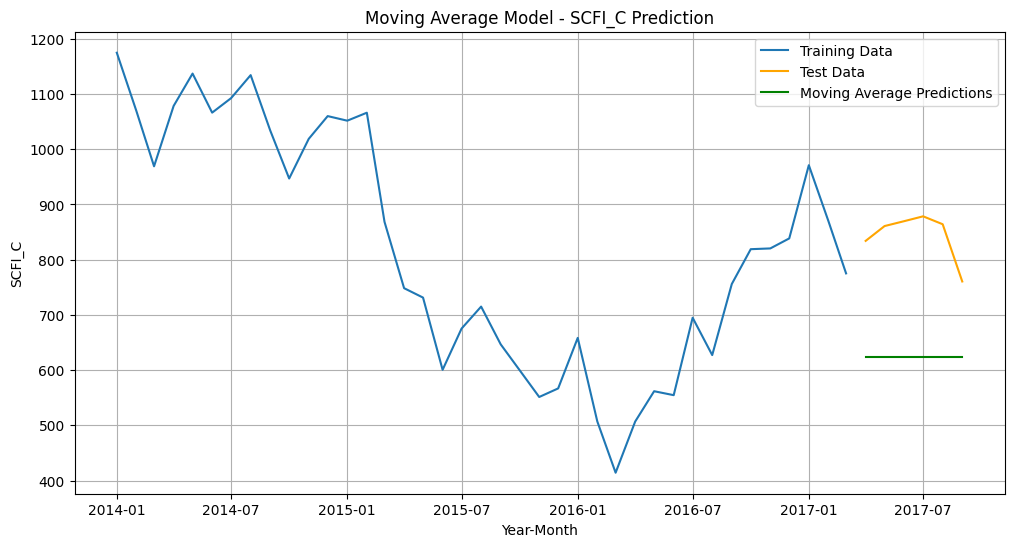

224.89831832515262

In [78]:
# 이동평균법 적용하기, window size을 12 months로 설정
window_size = 12
train['Moving_Avg'] = train['SCFI_C'].rolling(window=window_size).mean()

# 예측을 위하여 마지막 윈도우 창의 값이 사용된다.
train_last_values = train['Moving_Avg'].dropna().tail(window_size).values
print('train_last_values :', train_last_values)
# test data 예측하기
test_predictions = [train_last_values.mean()] * len(test)
print('test_predictions :', test_predictions)

# test data에 대한 RMSE 계산
test_rmse = sqrt(mean_squared_error(test['SCFI_C'], test_predictions))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train['YYYYMM'], train['SCFI_C'], label='Training Data')
plt.plot(test['YYYYMM'], test['SCFI_C'], label='Test Data', color='orange')
plt.plot(test['YYYYMM'], test_predictions, label='Moving Average Predictions', color='green')
plt.title('Moving Average Model - SCFI_C Prediction')
plt.xlabel('Year-Month')
plt.ylabel('SCFI_C')
plt.legend()
plt.grid(True)
plt.show()

# Returning the RMSE for the test data
test_rmse


In [79]:
test_predictions

[623.3641805555555,
 623.3641805555555,
 623.3641805555555,
 623.3641805555555,
 623.3641805555555,
 623.3641805555555]

# 도표 17-23. 창 크기 조정에 따른 테스트데이터의 RMSE

In [80]:
import pandas as pd

# 파일 경로
file_path = '/content/sample_data/시계열분석_복합SCFI_2017.xlsx'

# 엑셀 파일 읽기
data = pd.read_excel(file_path)

# 데이터의 처음 몇 줄을 표시
data.head()
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# 날짜 형식 변환 및 인덱스 설정
data['YYYYMM'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m')
data.set_index('YYYYMM', inplace=True)

# 테스트 데이터 분리 (마지막 6개월)
test_data = data[-6:]
train_data = data[:-6]

# RMSE를 저장할 딕셔너리
rmse_train = {}
rmse_test = {}
rmse_full = {}

# 창 크기 1부터 12까지의 이동 평균 모델 생성 및 RMSE 계산
for window in range(1, 13):
    # 이동 평균 계산
    moving_avg = train_data['SCFI_C'].rolling(window=window).mean()

    # 이동 평균의 처음 몇 개 (window - 1)는 NaN이므로 제거
    train_data_with_predictions = moving_avg.dropna()
    actual_train = train_data['SCFI_C'][window - 1:]

    # 훈련 데이터 RMSE 계산
    rmse_train[window] = sqrt(mean_squared_error(actual_train, train_data_with_predictions))

    # 테스트 데이터 예측 (마지막 훈련 데이터의 이동평균 사용)
    test_predictions = np.full(test_data.shape[0], train_data_with_predictions.iloc[-1])

    # 테스트 데이터 RMSE 계산
    rmse_test[window] = sqrt(mean_squared_error(test_data['SCFI_C'], test_predictions))

    # 전체 데이터에 대한 이동 평균 계산
    moving_avg_full = data['SCFI_C'].rolling(window=window).mean().dropna()
    actual_full = data['SCFI_C'][window - 1:]

    # 전체 데이터 RMSE 계산
    rmse_full[window] = sqrt(mean_squared_error(actual_full, moving_avg_full))

# RMSE 결과를 데이터프레임으로 변환
rmse_train_df = pd.DataFrame(list(rmse_train.items()), columns=['Window Size', 'Train RMSE'])
rmse_test_df = pd.DataFrame(list(rmse_test.items()), columns=['Window Size', 'Test RMSE'])
rmse_full_df = pd.DataFrame(list(rmse_full.items()), columns=['Window Size', 'Full Data RMSE'])

# 결과 통합
rmse_df = rmse_train_df.set_index('Window Size').join(rmse_test_df.set_index('Window Size')).join(rmse_full_df.set_index('Window Size'))
rmse_df.reset_index(inplace=True)
rmse_df


,Window Size,Train RMSE,Test RMSE,Full Data RMSE
0,1,0.000000,80.200531,0.000000
1,2,43.665937,45.721642,41.636740
2,3,65.439021,48.520354,62.078870
3,4,76.314794,44.321550,72.297372
4,5,90.327789,41.348922,84.905474
5,6,103.319850,40.264604,96.384666
6,7,115.209402,41.012598,106.723370
7,8,128.370895,53.172900,118.560146
8,9,141.299629,62.312426,130.426103
9,10,154.327497,82.366919,142.146420


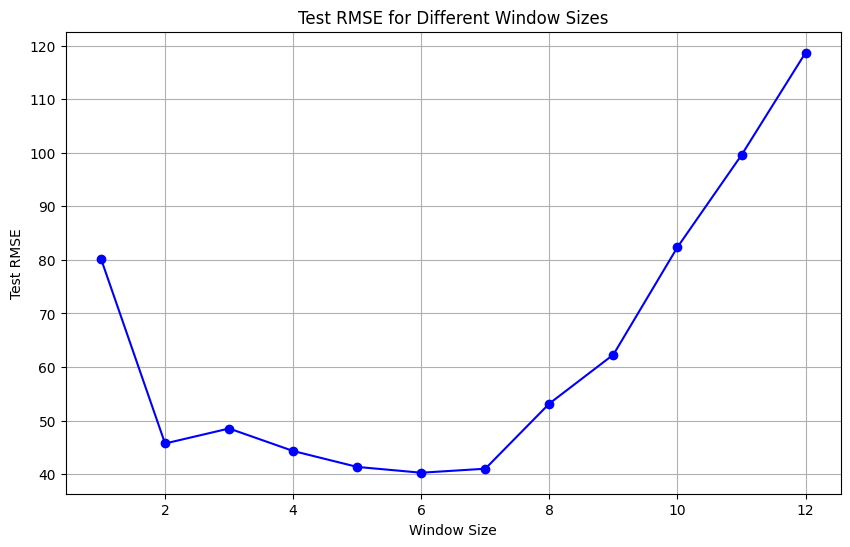

In [81]:
# 창 크기별 RMSE를 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(rmse_test_table['Window Size'], rmse_test_table['Test RMSE'], marker='o', color='b')
plt.title('Test RMSE for Different Window Sizes')
plt.xlabel('Window Size')
plt.ylabel('Test RMSE')
plt.grid(True)
plt.show()


In [82]:
# 테스트 데이터에 대한 RMSE만 포함하는 표 생성
rmse_test_table = rmse_df[['Window Size', 'Test RMSE']]
rmse_test_table


,Window Size,Test RMSE
0,1,80.200531
1,2,45.721642
2,3,48.520354
3,4,44.321550
4,5,41.348922
5,6,40.264604
6,7,41.012598
7,8,53.172900
8,9,62.312426
9,10,82.366919


# 도표 17-24. 창 크기 6인 경우의 이동평균법 예측 결과 시각화

In [83]:
# 테스트 데이터에 대한 최소 RMSE를 가지는 창 크기 찾기
optimal_window_size = rmse_df['Test RMSE'].idxmin() + 1  # 인덱스는 0부터 시작하므로 1을 더함
optimal_window_size_rmse = rmse_df.loc[optimal_window_size - 1, 'Test RMSE']  # 창 크기에 해당하는 RMSE

optimal_window_size, optimal_window_size_rmse


(6, 40.26460435012647)

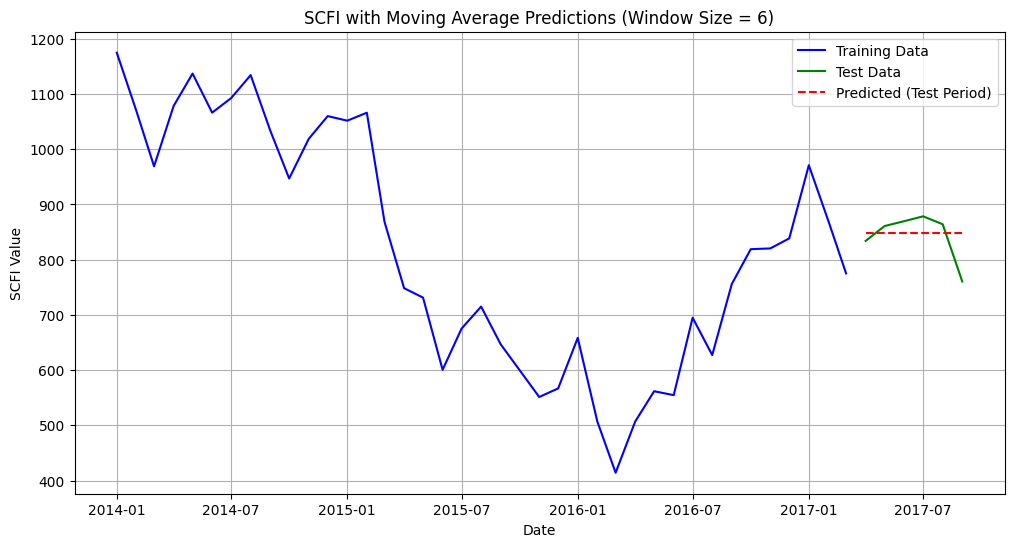

In [84]:
# 창 크기 6에 대한 최근 6개월의 평균값 계산 (테스트 기간 이전의 데이터)
test_period_avg = train_data['SCFI_C'][-optimal_window_size:].mean()

# 테스트 기간의 예측값 (모두 동일)
test_predictions_corrected = np.full(test_data.shape[0], test_period_avg)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(train_data['SCFI_C'], label='Training Data', color='blue')
plt.plot(test_data['SCFI_C'], label='Test Data', color='green')
plt.plot(test_data.index, test_predictions_corrected, label='Predicted (Test Period)', color='red', linestyle='--')
plt.title(f'SCFI with Moving Average Predictions (Window Size = {optimal_window_size})')
plt.xlabel('Date')
plt.ylabel('SCFI Value')
plt.legend()
plt.grid(True)
plt.show()


In [85]:
# 창 크기 6에 대한 최근 6개월의 평균값 계산
test_period_avg_window_6 = train_data['SCFI_C'][-6:].mean()

# 테스트 기간의 예측값과 실제값을 표로 정리
test_performance_df = pd.DataFrame({
    'Date': test_data.index,
    'Actual SCFI': test_data['SCFI_C'],
    'Predicted SCFI': np.full(test_data.shape[0], test_period_avg_window_6)
})

test_performance_df.set_index('Date', inplace=True)
test_performance_df



,Actual SCFI,Predicted SCFI
Date,,
2017-04-01,834.060,849.037833
2017-05-01,860.922,849.037833
2017-06-01,869.764,849.037833
2017-07-01,878.540,849.037833
2017-08-01,864.205,849.037833
2017-09-01,760.540,849.037833


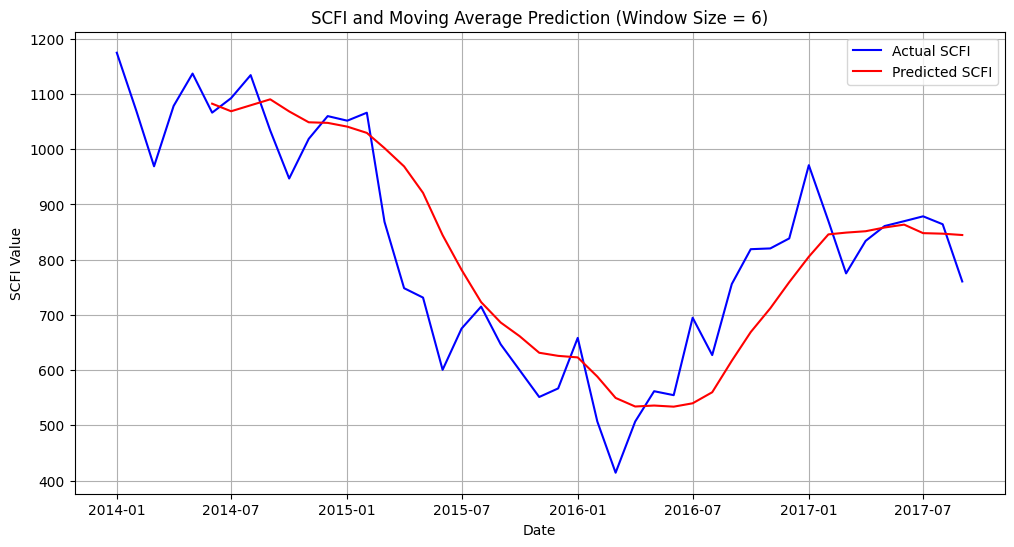

In [86]:
import matplotlib.pyplot as plt

# 창 크기 6에 대한 이동 평균 계산
data['Moving Average'] = data['SCFI_C'].rolling(window=optimal_window_size).mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(data['SCFI_C'], label='Actual SCFI', color='blue')
plt.plot(data['Moving Average'], label='Predicted SCFI', color='red')
plt.title('SCFI and Moving Average Prediction (Window Size = 6)')
plt.xlabel('Date')
plt.ylabel('SCFI Value')
plt.legend()
plt.grid(True)
plt.show()


# 도표 17-25. 전체 데이터의 창 크기의 변화에 따른 이동평균값

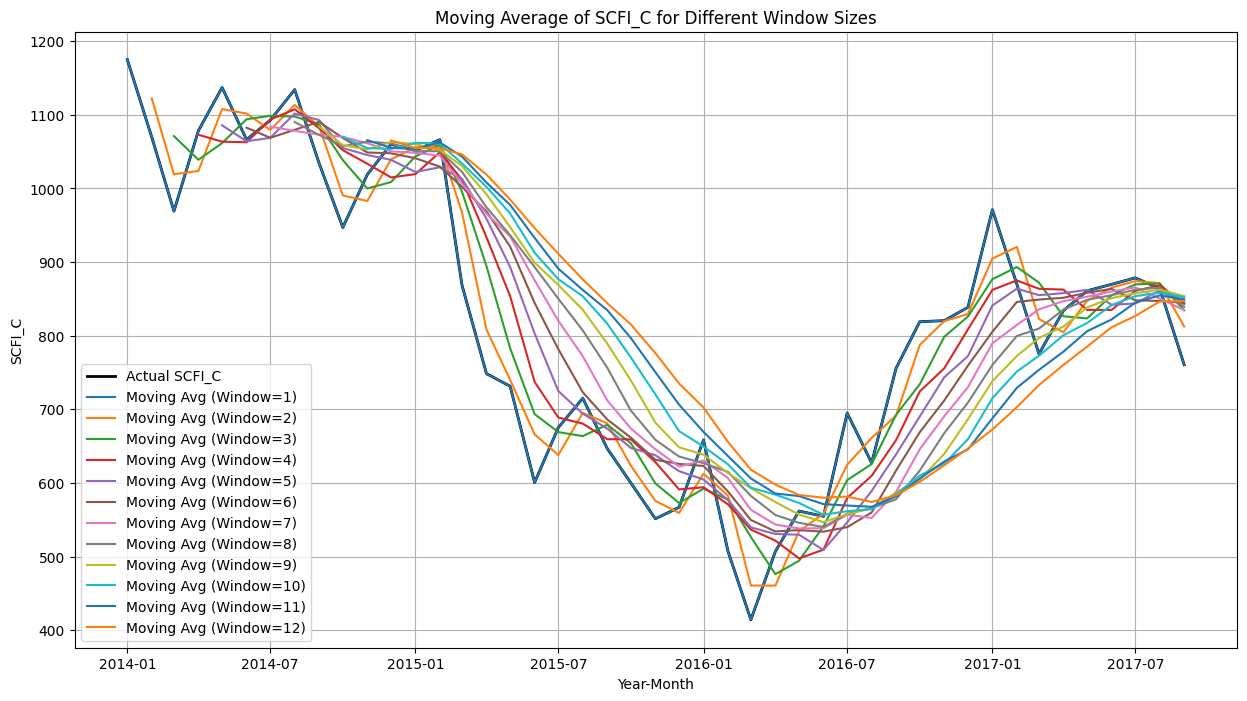

In [87]:
data = pd.read_excel(file_path)

# 날짜 형식 변환 및 인덱스 설정
data['YYYYMM'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m')
# data.set_index('YYYYMM', inplace=True)

window_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Function to calculate moving average for a given window size
def apply_moving_average(data, window_size):
    return data['SCFI_C'].rolling(window=window_size).mean()

# Applying moving average for each window size and storing in the dataframe
for window in window_sizes:
    data[f'Moving_Avg_{window}'] = apply_moving_average(data, window)

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(data['YYYYMM'], data['SCFI_C'], label='Actual SCFI_C', color='black', linewidth=2)

# Plotting each moving average
for window in window_sizes:
    plt.plot(data['YYYYMM'], data[f'Moving_Avg_{window}'], label=f'Moving Avg (Window={window})')

plt.title('Moving Average of SCFI_C for Different Window Sizes')
plt.xlabel('Year-Month')
plt.ylabel('SCFI_C')
plt.legend()
plt.grid(True)
plt.show()